In [10]:
# Importing libraries and dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [11]:
pip install kagglehub


In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uom190346a/ai-powered-job-market-insights")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Augus\.cache\kagglehub\datasets\uom190346a\ai-powered-job-market-insights\versions\1


In [13]:
import os
files = os.listdir(path)
print("Files in dataset folder:", files)

Files in dataset folder: ['ai_job_market_insights.csv']


In [14]:
import pandas as pd
csv_file = os.path.join(path, 'ai_job_market_insights.csv')  
job_market_data = pd.read_csv(csv_file)


print(job_market_data.head())

               Job_Title       Industry Company_Size   Location  \
0  Cybersecurity Analyst  Entertainment        Small      Dubai   
1   Marketing Specialist     Technology        Large  Singapore   
2          AI Researcher     Technology        Large  Singapore   
3          Sales Manager         Retail        Small     Berlin   
4  Cybersecurity Analyst  Entertainment        Small      Tokyo   

  AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD  \
0            Medium            High        UX/UI Design  111392.165243   
1            Medium            High           Marketing   93792.562466   
2            Medium            High        UX/UI Design  107170.263069   
3               Low            High  Project Management   93027.953758   
4               Low             Low          JavaScript   87752.922171   

  Remote_Friendly Job_Growth_Projection  
0             Yes                Growth  
1              No               Decline  
2             Yes         

In [15]:
# Creating job title value count 
job_title_counts = job_market_data['Job_Title'].value_counts()

job_title_counts


Job_Title
Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Sales Manager            49
Marketing Specialist     48
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: count, dtype: int64

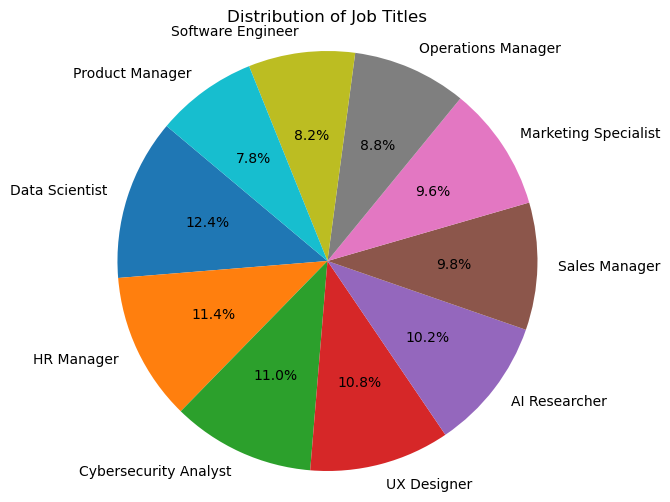

In [16]:
# Plotting the job titles in a piechart
plt.figure(figsize=(8, 6))
plt.pie(job_title_counts, labels=job_title_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Job Titles')
plt.axis('equal')
plt.show()

In [17]:
# Creating inudstry value count
industry = job_market_data["Industry"].value_counts()

industry

Industry
Manufacturing         58
Education             57
Technology            56
Finance               53
Telecommunications    53
Energy                49
Entertainment         47
Retail                46
Healthcare            42
Transportation        39
Name: count, dtype: int64

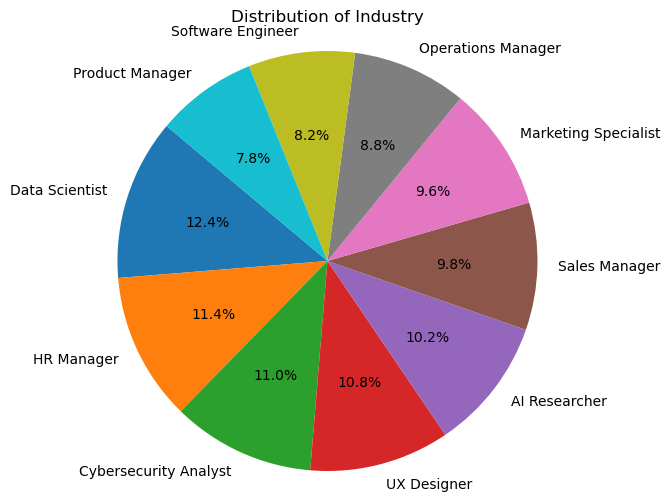

In [18]:
# Plotting the industries in a piechart
plt.figure(figsize=(8, 6))
plt.pie(job_title_counts, labels=job_title_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Industry')
plt.axis('equal')
plt.show()

In [19]:
# Creating Company size value count
company_size = job_market_data["Company_Size"].value_counts()

company_size

Company_Size
Small     171
Large     166
Medium    163
Name: count, dtype: int64

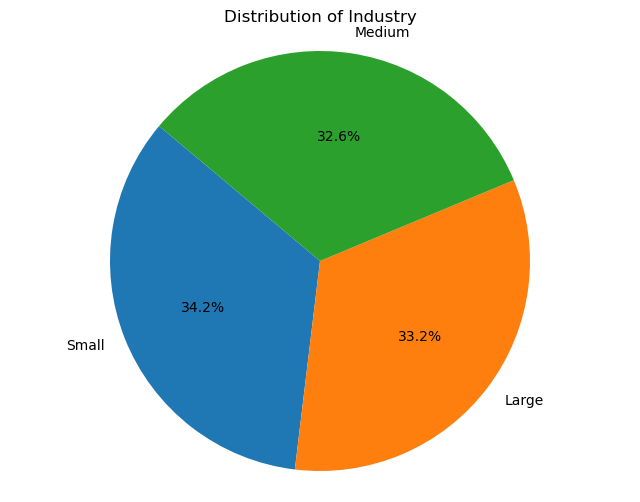

In [20]:
# Plotting the company size in a piechart
plt.figure(figsize=(8, 6))
plt.pie(company_size, labels=company_size.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Industry')
plt.axis('equal')
plt.show()

In [21]:
# Creating Job location value count
job_location_count = job_market_data["Location"].value_counts()
job_location_count

Location
San Francisco    62
Singapore        54
Sydney           52
Dubai            51
Tokyo            51
New York         49
Berlin           48
London           46
Paris            46
Toronto          41
Name: count, dtype: int64

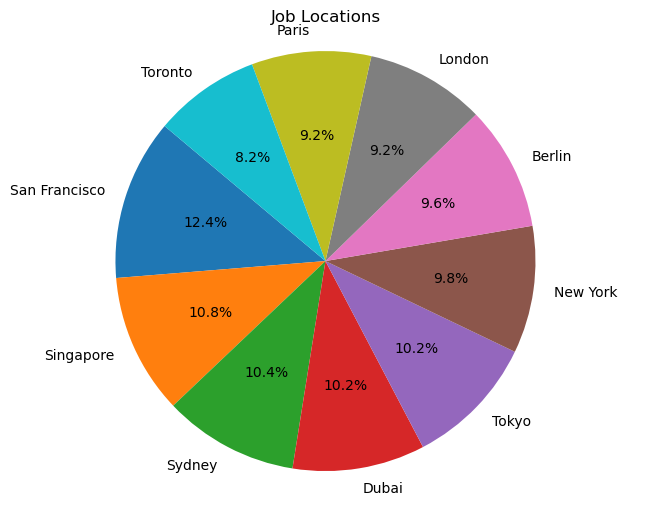

In [22]:
# Plotting the job titles in a piechart
plt.figure(figsize=(8, 6))
plt.pie(job_location_count, labels=job_location_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Job Locations')
plt.axis('equal')
plt.show()

In [23]:
# Creating Ai adoption value count
ai_adoption_level = job_market_data["AI_Adoption_Level"].value_counts()

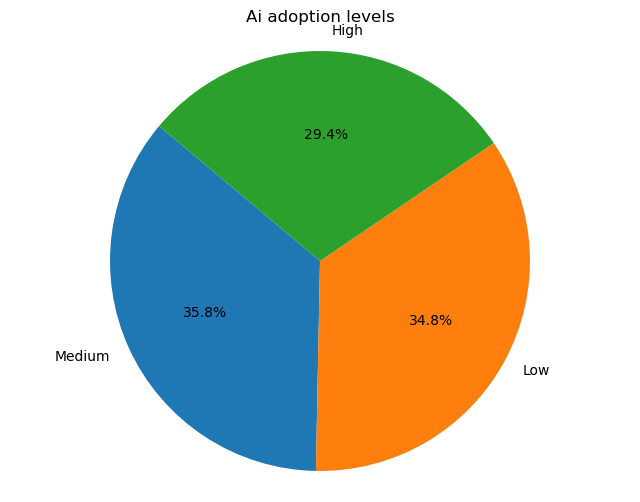

In [24]:
# Plotting the AI Adoption Levels in a piechart
plt.figure(figsize=(8, 6))
plt.pie(ai_adoption_level, labels=ai_adoption_level.index, autopct='%1.1f%%', startangle=140)
plt.title('Ai adoption levels')
plt.axis('equal')
plt.show()

In [25]:
# Creating automation risk value count 
automation_risk = job_market_data["Automation_Risk"].value_counts()

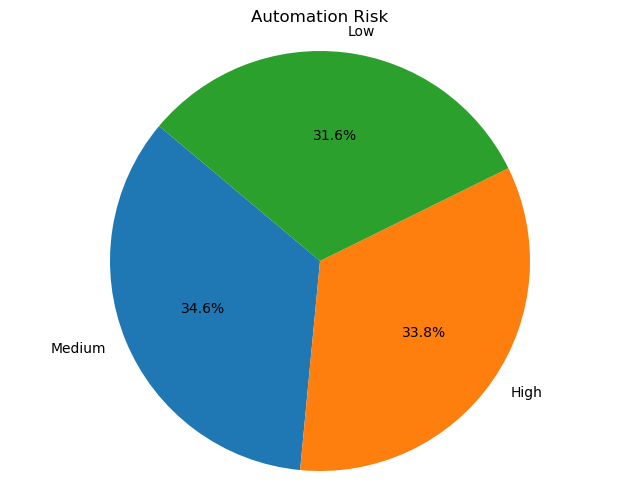

In [26]:
# Plotting the Automation risk in a piechart
plt.figure(figsize=(8, 6))
plt.pie(automation_risk, labels=automation_risk.index, autopct='%1.1f%%', startangle=140)
plt.title('Automation Risk')
plt.axis('equal')
plt.show()

In [27]:
# Creating required skills value count
required_skills = job_market_data["Required_Skills"].value_counts()

required_skills

Required_Skills
Project Management    60
Python                60
Cybersecurity         58
Machine Learning      52
UX/UI Design          49
Sales                 49
Data Analysis         49
Marketing             45
JavaScript            44
Communication         34
Name: count, dtype: int64

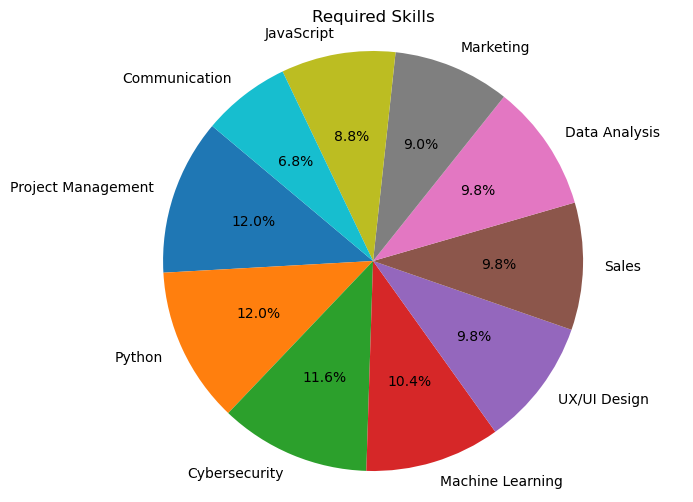

In [28]:
# Plotting the required skills in a piechart
plt.figure(figsize=(8, 6))
plt.pie(required_skills, labels=required_skills.index, autopct='%1.1f%%', startangle=140)
plt.title('Required Skills')
plt.axis('equal')
plt.show()

In [29]:
# Using pd.quantile to break salary into five different buckets 
salary_column = job_market_data["Salary_USD"]

# This sets up the five different buckets 
quintiles = salary_column.quantile([0, 0.2, 0.4, 0.6, 0.8, 1])

# Using pd.cut() to assign each salary to one of the five buckets
job_market_data['Salary_Bucket'] = pd.cut(salary_column, bins=quintiles, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'], include_lowest=True)

# Display the first few rows with the new bucket column
job_market_data[['Salary_USD', 'Salary_Bucket']].head()

,Salary_USD,Salary_Bucket
0,111392.165243,Very High
1,93792.562466,Medium
2,107170.263069,Very High
3,93027.953758,Medium
4,87752.922171,Medium


In [30]:
# Creating a value counts for bucket 
bucket_counts = job_market_data['Salary_Bucket'].value_counts().sort_index()

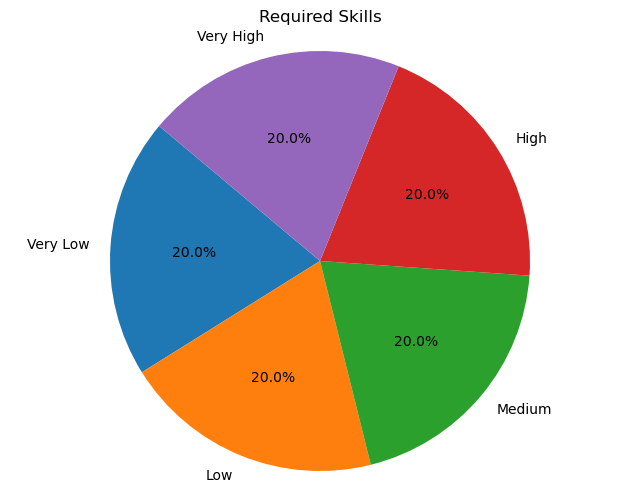

In [31]:
# Plotting the required skills in a piechart
plt.figure(figsize=(8, 6))
plt.pie(bucket_counts, labels=bucket_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Required Skills')
plt.axis('equal')
plt.show()

In [32]:
import pandas as pd
job_market_data = pd.read_csv(r'C:\Users\Augus\Desktop\ai_job_market_insights.csv')

mean_salary = job_market_data['Salary_USD'].mean()
print(f"The mean salary is: {mean_salary}")

std_salary = job_market_data['Salary_USD'].std()
print(f"The standard deviation is: {std_salary}")

The mean salary is: 91222.39097411344
The standard deviation is: 20504.291453477774


In [33]:
import kagglehub
import pandas as pd
from sklearn.preprocessing import StandardScaler


path = kagglehub.dataset_download("uom190346a/ai-powered-job-market-insights")
print("Path to dataset files:", path)


dataset_path = f"{path}/ai_job_market_insights.csv"  
job_market_data = pd.read_csv(dataset_path)

scaler = StandardScaler()
salary = job_market_data[['Salary_USD']]

job_market_data['Salary_USD_Scaled'] = scaler.fit_transform(salary)

print(job_market_data[['Salary_USD', 'Salary_USD_Scaled']].head())

Path to dataset files: C:\Users\Augus\.cache\kagglehub\datasets\uom190346a\ai-powered-job-market-insights\versions\1
      Salary_USD  Salary_USD_Scaled
0  111392.165243           0.984671
1   93792.562466           0.125474
2  107170.263069           0.778561
3   93027.953758           0.088146
4   87752.922171          -0.169376


In [34]:
Q1 = job_market_data['Salary_USD'].quantile(0.25)
Q3 = job_market_data['Salary_USD'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = job_market_data[(job_market_data['Salary_USD'] < lower_bound) | (job_market_data['Salary_USD'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print(outliers[['Salary_USD']])


Number of outliers: 5
        Salary_USD
182   31969.526346
289  148467.112346
384   33601.381360
420  155209.821614
425   35963.297317


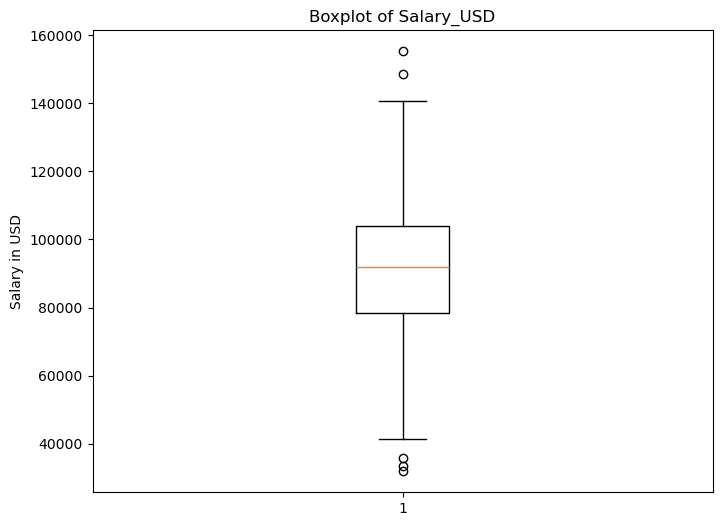

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(job_market_data['Salary_USD'])
plt.title('Boxplot of Salary_USD')
plt.ylabel('Salary in USD')
plt.show()


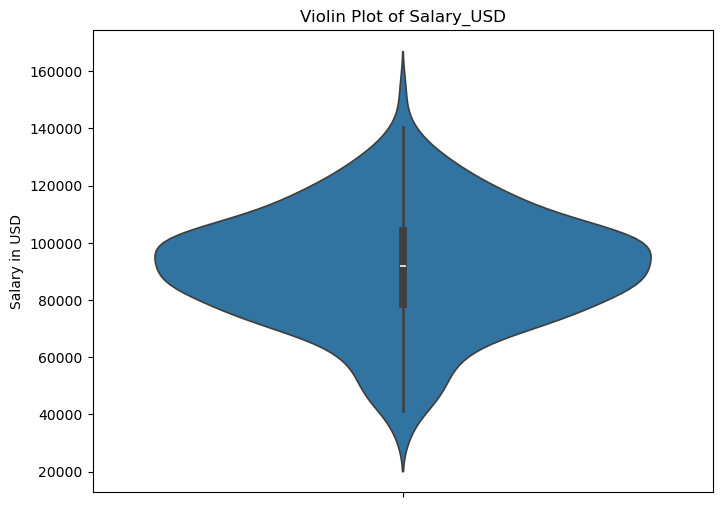

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a violin plot of the Salary_USD column
plt.figure(figsize=(8, 6))
sns.violinplot(y=job_market_data['Salary_USD'])
plt.title('Violin Plot of Salary_USD')
plt.ylabel('Salary in USD')
plt.show()

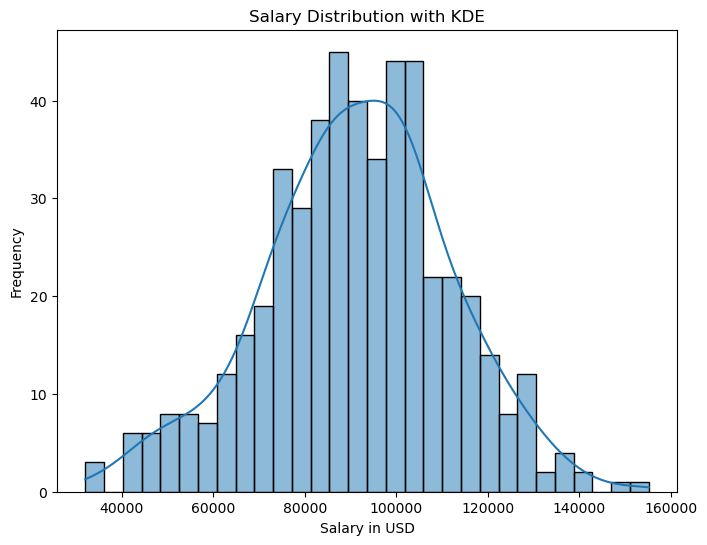

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.histplot(job_market_data['Salary_USD'], kde=True, bins=30)
plt.title('Salary Distribution with KDE')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

In [38]:

grouped_data = job_market_data.groupby(['Company_Size', 'Automation_Risk']).size().unstack()

print(grouped_data)

Automation_Risk  High  Low  Medium
Company_Size                      
Large              58   42      66
Medium             52   63      48
Small              59   53      59


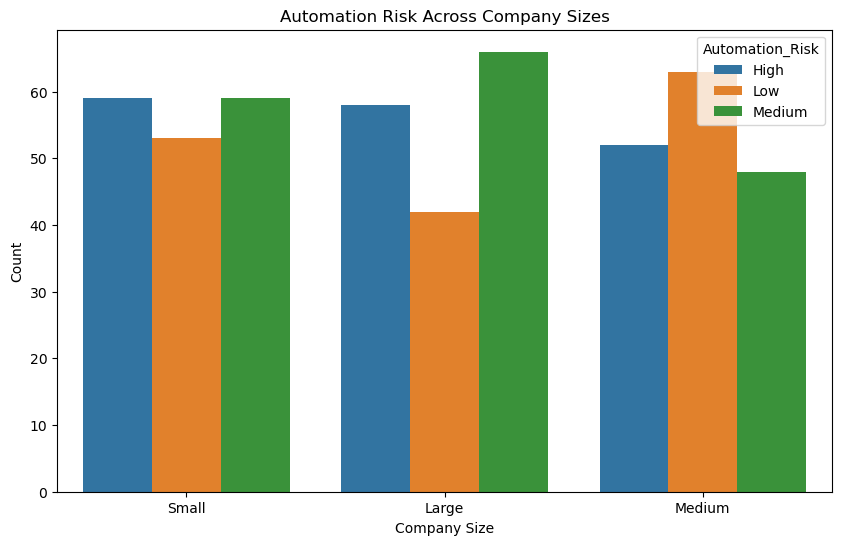

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=job_market_data, x='Company_Size', hue='Automation_Risk')
plt.title('Automation Risk Across Company Sizes')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.show()

In [40]:
print(job_market_data.columns)

Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD',
       'Remote_Friendly', 'Job_Growth_Projection', 'Salary_USD_Scaled'],
      dtype='object')


In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
job_market_data['AI_Adoption_Level_Encoded'] = job_market_data['AI_Adoption_Level'].map(risk_mapping)

risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
job_market_data['Automation_Risk_Encoded'] = job_market_data['Automation_Risk'].map(risk_mapping)

print(job_market_data[['AI_Adoption_Level', 'AI_Adoption_Level_Encoded', 'Automation_Risk', 'Automation_Risk_Encoded']].head(10))

  AI_Adoption_Level  AI_Adoption_Level_Encoded Automation_Risk  \
0            Medium                          1            High   
1            Medium                          1            High   
2            Medium                          1            High   
3               Low                          0            High   
4               Low                          0             Low   
5            Medium                          1          Medium   
6               Low                          0            High   
7            Medium                          1             Low   
8              High                          2             Low   
9              High                          2             Low   

   Automation_Risk_Encoded  
0                        2  
1                        2  
2                        2  
3                        2  
4                        0  
5                        1  
6                        2  
7                        0  
8           

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv(csv_file)  # Update the path to your dataset

# Encode the target variable (Automation Risk)
risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Automation_Risk_Encoded'] = df['Automation_Risk'].map(risk_mapping)

# Selecting the relevant features and target
features_expanded = df[['Job_Title', 'Location', 'Industry', 'AI_Adoption_Level', 'Salary_USD']]
target = df['Automation_Risk_Encoded']

# Encoding categorical variables
encoder = LabelEncoder()
features_expanded['Job_Title'] = encoder.fit_transform(features_expanded['Job_Title'])
features_expanded['Location'] = encoder.fit_transform(features_expanded['Location'])
features_expanded['Industry'] = encoder.fit_transform(features_expanded['Industry'])
features_expanded['AI_Adoption_Level'] = encoder.fit_transform(features_expanded['AI_Adoption_Level'])

# Splitting the data into training and testing sets
X_train_expanded, X_test_expanded, y_train_expanded, y_test_expanded = train_test_split(
    features_expanded, target, test_size=0.3, random_state=42
)

# Defining a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest with class weights
class_weights_optimal = {0: 3, 1: 1, 2: 1}  # Adjusting class weights for imbalance
rfc = RandomForestClassifier(random_state=42, class_weight=class_weights_optimal)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_expanded, y_train_expanded)

# Print the best parameters
print(grid_search.best_params_)

# Train and evaluate the final model with the best hyperparameters
best_rfc = RandomForestClassifier(**grid_search.best_params_, random_state=42, class_weight=class_weights_optimal)
best_rfc.fit(X_train_expanded, y_train_expanded)
y_pred_best = best_rfc.predict(X_test_expanded)

# Generate a classification report
print(classification_report(y_test_expanded, y_pred_best, target_names=['Low', 'Medium', 'High']))


C:\Users\Augus\AppData\Local\Temp\ipykernel_26376\3322197584.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_expanded['Job_Title'] = encoder.fit_transform(features_expanded['Job_Title'])
C:\Users\Augus\AppData\Local\Temp\ipykernel_26376\3322197584.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_expanded['Location'] = encoder.fit_transform(features_expanded['Location'])
C:\Users\Augus\AppData\Local\Temp\ipykernel_26376\3322197584.py:23: SettingWithCopyWarning: 
A value is trying t

Fitting 5 folds for each of 162 candidates, totalling 810 fits
{'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

         Low       0.38      0.53      0.44        53
      Medium       0.43      0.37      0.40        49
        High       0.35      0.25      0.29        48

    accuracy                           0.39       150
   macro avg       0.39      0.38      0.38       150
weighted avg       0.39      0.39      0.38       150

